In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load dataset 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


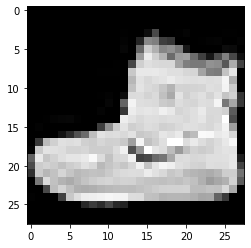

In [3]:
# Visualize a sample image
plt.imshow(X_train[0], cmap = 'gray')

In [4]:
# check out the shape of the training data
X_train.shape

(60000, 28, 28)

In [5]:
# check out the shape of the testing data
X_test.shape

(10000, 28, 28)

# DATA VISUALIZATION

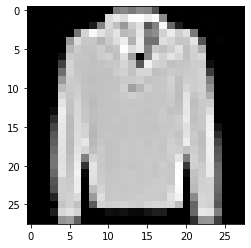

In [8]:
# Random Image
i = random.randint(1, 60000)
plt.imshow(X_train[i], cmap = 'gray')

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot

In [9]:
label = y_train[i]
label

4

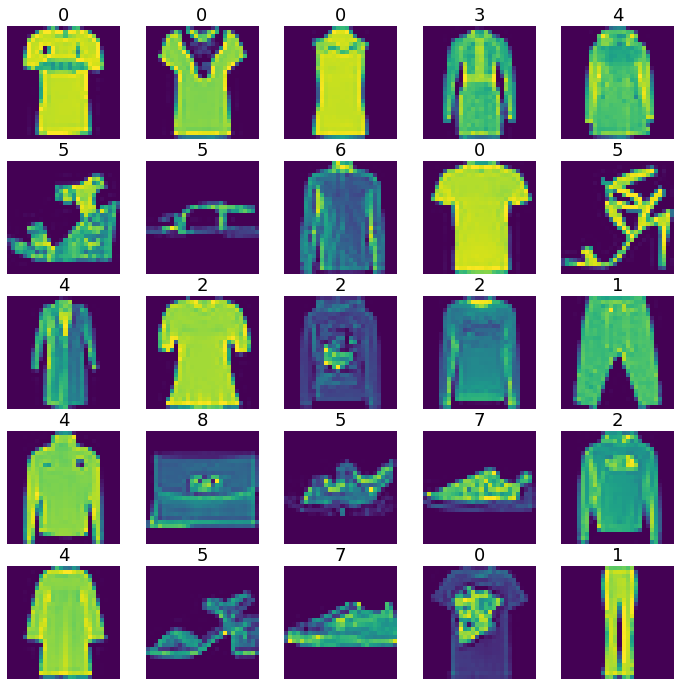

In [11]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))

axes = axes.ravel()

n_training = len(X_train) 

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 18)
    axes[i].axis('off')


# DATA PREPROCESSING

In [0]:
# normalize data
X_train = X_train/255
X_test = X_test/255

In [0]:
# add some noise
noise_factor = 0.3
noise_dataset = []

for img in X_train:
    noisy_image = img + noise_factor * np.random.randn (*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset.append(noisy_image)

In [0]:
noise_dataset = np.array(noise_dataset)

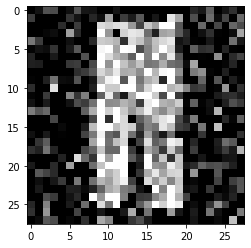

In [15]:
plt.imshow(noise_dataset[21], cmap = 'gray')

In [0]:
# add noise to testing dataset

noise_factor = 0.1
noise_test_dataset = []

for img in X_test:
    noisy_image = img + noise_factor * np.random.randn (*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_test_dataset.append(noisy_image)

In [0]:
noise_test_dataset = np.array(noise_test_dataset)

# BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [0]:
autoencoder = tf.keras.models.Sequential()

#encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = 'same', input_shape = (28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same'))

#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2, activation = 'sigmoid',  padding = 'same'))



In [19]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [20]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 1s 5ms/step - loss: 0.4038 - val_loss: 0.3222
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3186 - val_loss: 0.3051
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3104 - val_loss: 0.2986
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3065 - val_loss: 0.2950
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3044 - val_loss: 0.2917
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3032 - val_loss: 0.2911
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3024 - val_loss: 0.2909
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3018 - val_loss: 0.2894
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3013 - val_loss: 0.2888
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3009 - val_loss: 0.2885

# EVALUATE TRAINED MODEL PERFORMANCE

In [21]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))
print('Test Loss: {:.3f}'.format(evaluation))

313/313 [==============================] - 1s 2ms/step - loss: 0.2884
Test Loss: 0.288


In [0]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1, 28, 28,1))

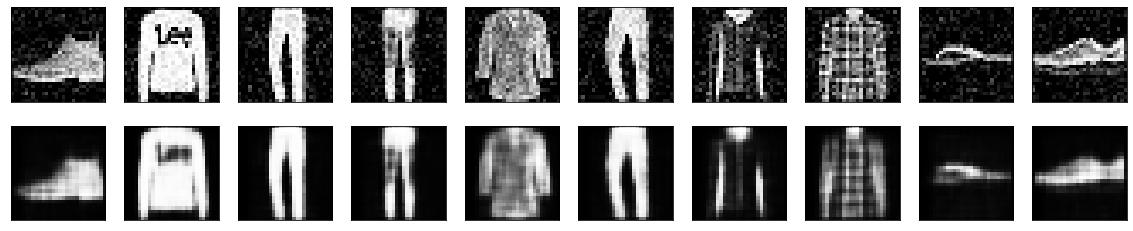

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)